<a href="https://colab.research.google.com/github/johnjustine5646/AML_Labs_Trisem2/blob/main/CTR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

In [ ]:
df = pd.read_csv('/content/ad_10000records.csv')
df.head(5)

Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                     62.26  32.0     69481.85                172.83   
1                     41.73  31.0     61840.26                207.17   
2                     44.40  30.0     57877.15                172.83   
3                     59.88  28.0     56180.93                207.17   
4                     49.21  30.0     54324.73                201.58   

                         Ad Topic Line             City  Gender  \
0      Decentralized real-time circuit         Lisafort    Male   
1       Optional full-range projection  West Angelabury    Male   
2  Total 5thgeneration standardization        Reyesfurt  Female   
3          Balanced empowering success      New Michael  Female   
4  Total 5thgeneration standardization     West Richard  Female   

                        Country            Timestamp  Clicked on Ad  
0  Svalbard & Jan Mayen Islands  2016-06-09 21:43:05              0  
1                     Singapore  2016-01-16 17:56:05              0  
2                    Guadeloupe  2016-06-29 10:50:45              0  
3                        Zambia  2016-06-21 14:32:32              0  
4                         Qatar  2016-07-21 10:54:35              1

In [ ]:
# df['Citynew'] = df['City'].copy()

In [ ]:
df.shape

(10000, 10)

In [ ]:
df.columns



Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [ ]:
df['Ad Topic Line'].value_counts()

Cloned explicit middleware                 344
Streamlined homogeneous analyzer           212
Business-focused transitional solution     207
Sharable reciprocal project                187
Intuitive exuding service-desk             173
                                          ... 
Ergonomic neutral portal                     1
Implemented uniform synergy                  1
Visionary multi-tasking alliance             1
Inverse zero tolerance customer loyalty      1
Reactive interactive protocol                1
Name: Ad Topic Line, Length: 559, dtype: int64

In [ ]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
print("===== Numerical Columns =====")
print(numerical_cols, end="\n\n")

===== Numerical Columns =====
Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Clicked on Ad'],
      dtype='object')



In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("===== Categorical Columns =====")
print(categorical_cols, end="\n\n")

===== Categorical Columns =====
Index(['Ad Topic Line', 'City', 'Gender', 'Country', 'Timestamp'], dtype='object')



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [ ]:
df.describe()

Daily Time Spent on Site           Age   Area Income  \
count              10000.000000  10000.000000  10000.000000   
mean                  61.660757     35.940100  53840.047721   
std                   15.704142      8.572973  13343.708718   
min                   32.600000     19.000000  13996.500000   
25%                   48.860000     29.000000  44052.302500   
50%                   59.590000     35.000000  56180.930000   
75%                   76.580000     42.000000  61840.260000   
max                   90.970000     60.000000  79332.330000   

       Daily Internet Usage  Clicked on Ad  
count          10000.000000   10000.000000  
mean             177.759831       0.491700  
std               40.820951       0.499956  
min              105.220000       0.000000  
25%              140.150000       0.000000  
50%              178.920000       0.000000  
75%              212.670000       1.000000  
max              269.960000       1.000000

In [ ]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [ ]:
df.duplicated().sum()

215

In [ ]:
# droping duplicates
df.drop_duplicates(inplace = True)

In [ ]:
df['Clicked on Ad'].value_counts()

0    5004
1    4781
Name: Clicked on Ad, dtype: int64

 Distribution of daily time with ads

In [ ]:
px.histogram(df,x='Daily Time Spent on Site', color='Clicked on Ad',template="none",color_discrete_sequence= px.colors.sequential.Darkmint)

Distribution of daily internet with ads

In [ ]:
px.histogram(df,x='Daily Internet Usage', color='Clicked on Ad',template="none",color_discrete_sequence= px.colors.sequential.Teal)

Top city with daily time spent on site

In [ ]:
city_dailytime=pd.DataFrame(df.groupby('City')['Daily Time Spent on Site'].mean().sort_values(ascending=False)[:20])
city_dailytime=city_dailytime.rename_axis(['City']).reset_index()
city_dailytime
px.bar(city_dailytime, x='City', y='Daily Time Spent on Site',template="none",color_discrete_sequence= px.colors.sequential.Redor)

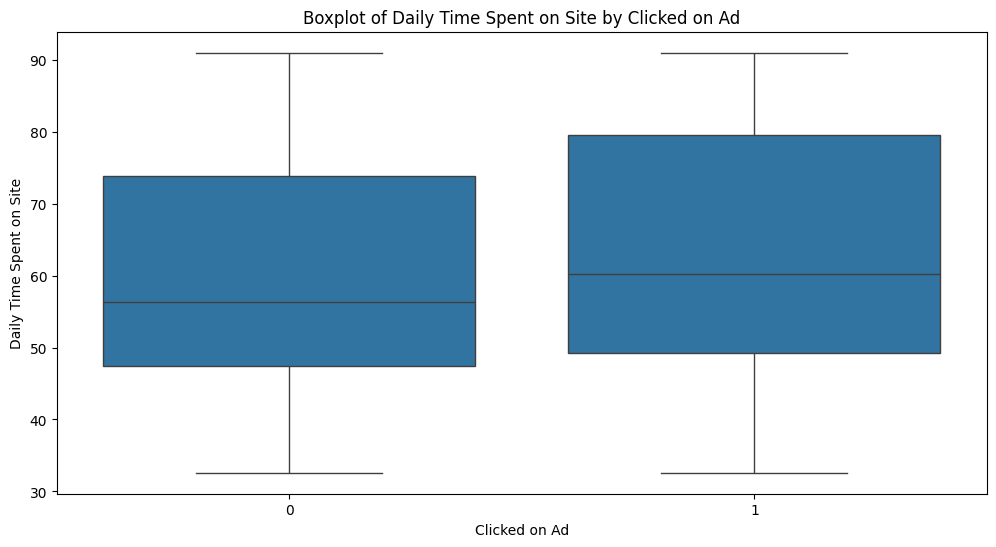

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Clicked on Ad', y='Daily Time Spent on Site', data=df)
plt.title('Boxplot of Daily Time Spent on Site by Clicked on Ad')
plt.show()


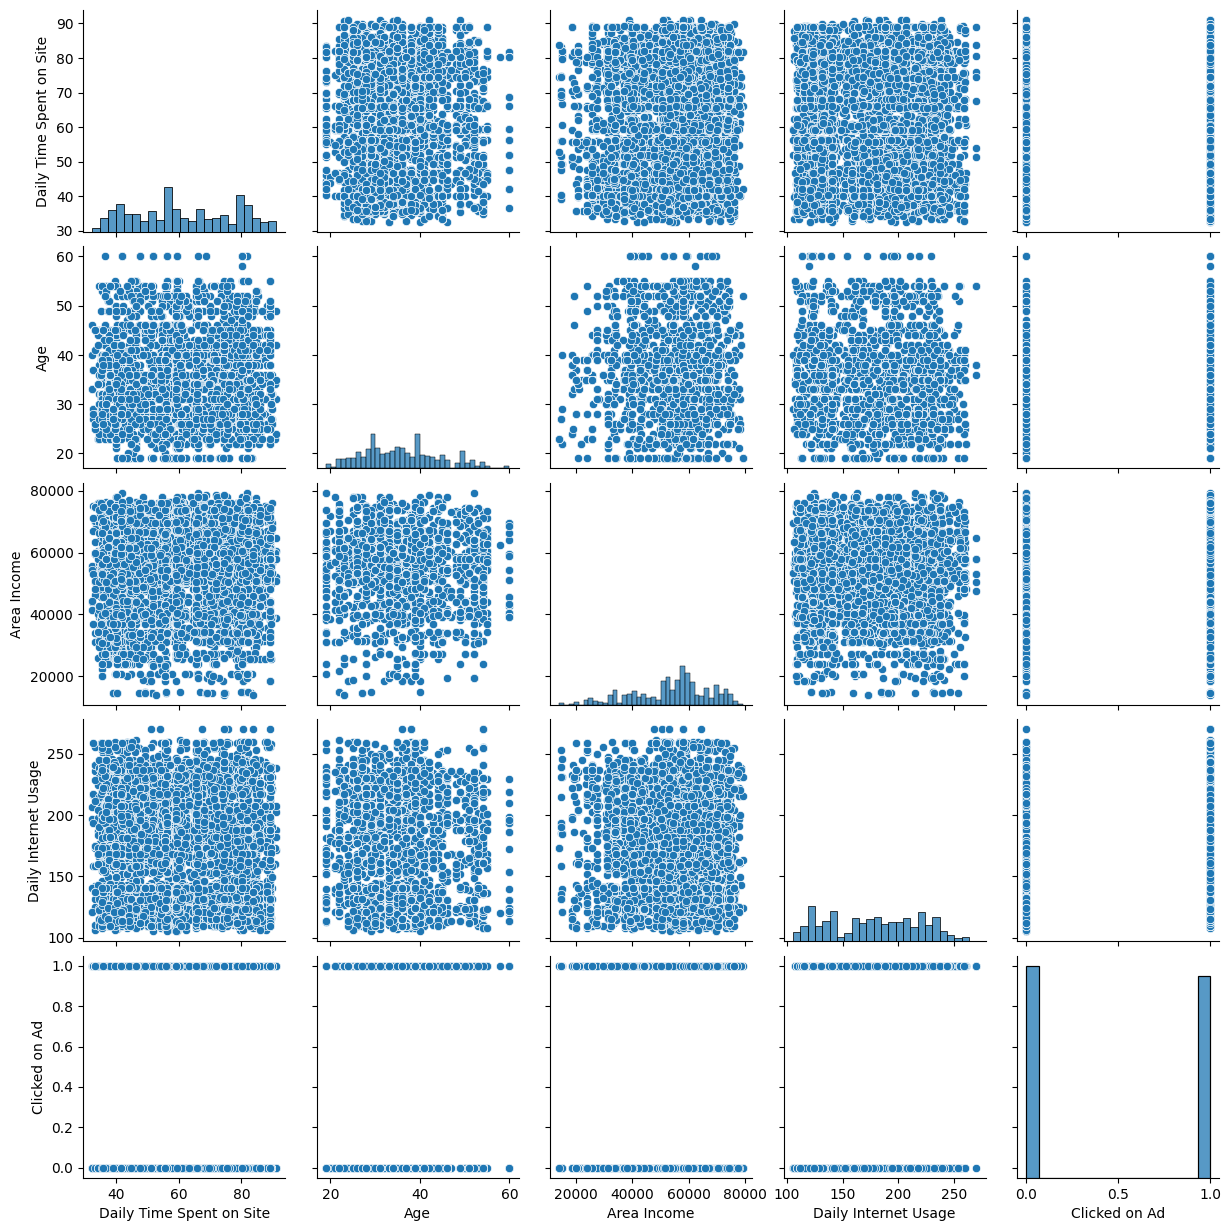

In [ ]:
sns.pairplot(df)

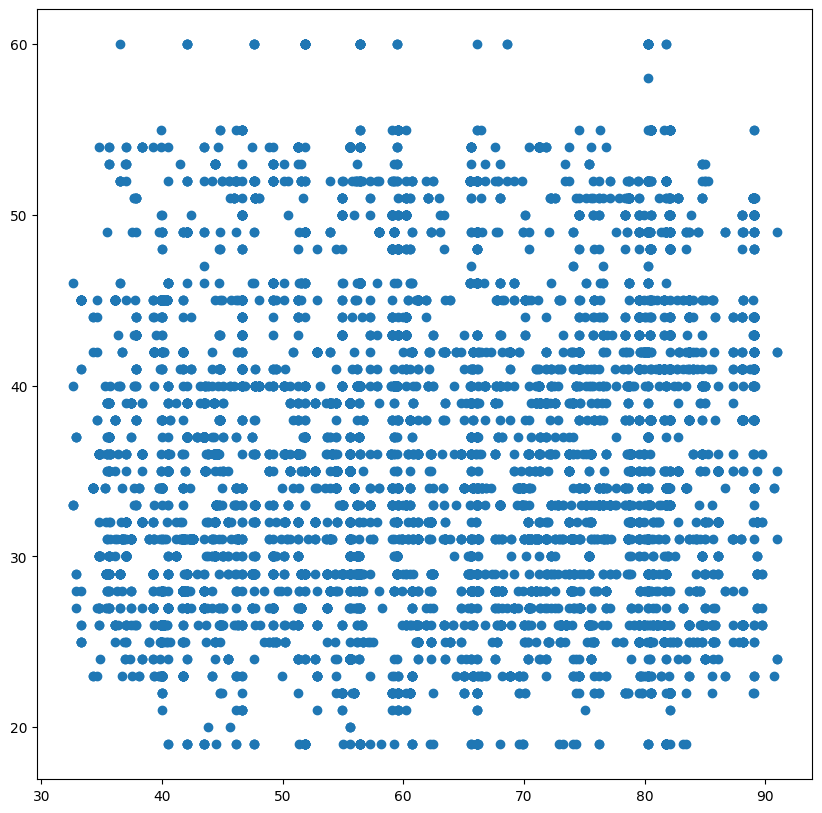

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df['Daily Time Spent on Site'],df['Age'])

<ipython-input-22-22afe5a3fd94>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



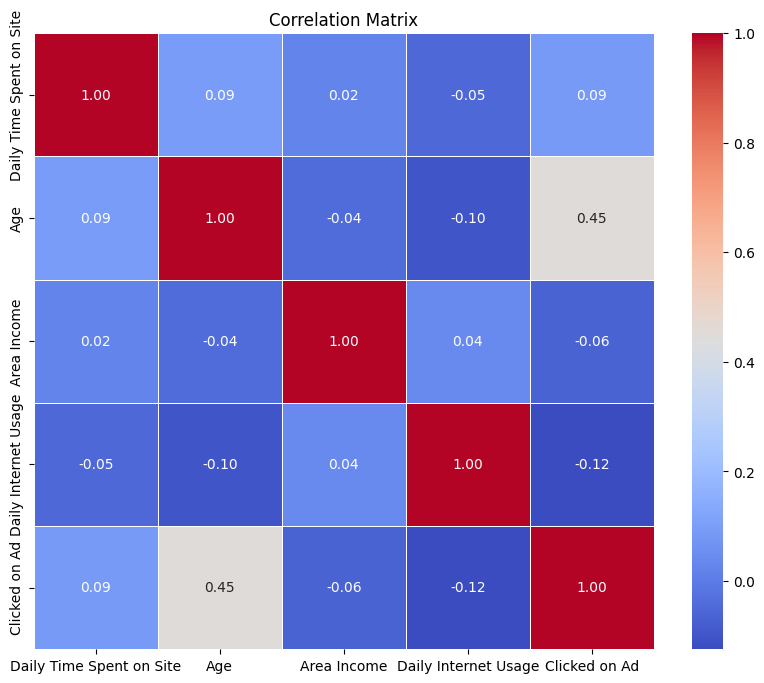

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
correlation_table = correlation_matrix.to_string()
print(correlation_table)


                          Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  Clicked on Ad
Daily Time Spent on Site                  1.000000  0.093117     0.020948             -0.052702       0.087020
Age                                       0.093117  1.000000    -0.041493             -0.101728       0.450654
Area Income                               0.020948 -0.041493     1.000000              0.041249      -0.064073
Daily Internet Usage                     -0.052702 -0.101728     0.041249              1.000000      -0.124950
Clicked on Ad                             0.087020  0.450654    -0.064073             -0.124950       1.000000


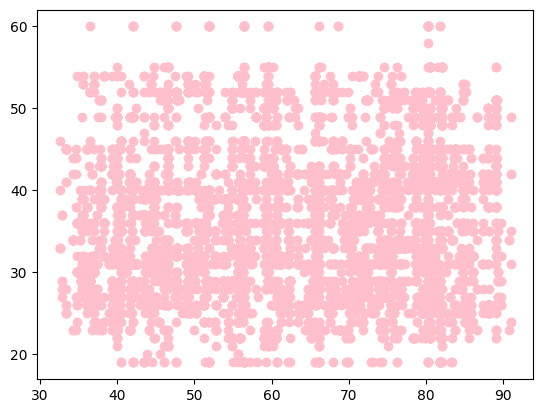

In [ ]:
plt.scatter(df['Daily Time Spent on Site'],df['Age'],c='pink')

In [ ]:
# Calculate the total number of users who clicked on the ad
clicked_users = df[df['Clicked on Ad'] == 1]['Clicked on Ad'].count()

# Calculate the total number of users who left an impression on the ad
total_users = df['Clicked on Ad'].count()

# Calculate the overall Ads click-through rate
ctr = (clicked_users / total_users) * 100

print(f"Overall Ads Click-Through Rate: {ctr:.2f}%")

Overall Ads Click-Through Rate: 48.86%


# Function to generate model report for each model

In [ ]:
#gives model report in dataframe
def model_report(model,training_x,training_y,testing_x,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    #predict_probab  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions)
    kappa_metric = cohen_kappa_score(testing_y,predictions)

    df = pd.DataFrame({"Model"           : [name],
                       'roc_auc_score':[roc_auc],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

In [ ]:
df=df[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender',
        'Clicked on Ad']]

label='Clicked on Ad'
features=list(df.columns)
features.remove(label)

X = df[features]
Y = df[label]

#Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object', 'category']).columns:
    X[col] = label_encoder.fit_transform(X[col])

<ipython-input-28-569500ccb8aa>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-569500ccb8aa>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-569500ccb8aa>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X

Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                        62.26  32.0     69481.85                172.83   
1                        41.73  31.0     61840.26                207.17   
2                        44.40  30.0     57877.15                172.83   
3                        59.88  28.0     56180.93                207.17   
4                        49.21  30.0     54324.73                201.58   
...                        ...   ...          ...                   ...   
9994                     41.73  28.0     39799.73                217.37   
9995                     41.73  31.0     61840.26                207.17   
9996                     41.73  28.0     51501.38                120.49   
9997                     55.60  39.0     38067.08                124.44   
9998                     46.61  50.0     43974.49                123.13   

      Ad Topic Line  City  Gender  
0                96   234       1  
1               301   460       1  
2               484   379       0  
3                24   269       0  
4               484   495       0  
...             ...   ...     ...  
9994            398    58       0  
9995            353   460       1  
9996            241   177       1  
9997            222   316       0  
9998            396   321       0  

[9785 rows x 7 columns]

In [ ]:
X.shape

(9785, 7)

#Outlier Removal

In [ ]:
import pandas as pd
from scipy.stats import zscore

# Assuming you have a DataFrame named 'X'

# Detecting the outliers
n_cols = X[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender']]
zscore_data = n_cols.apply(zscore)
outlier_rows = (zscore_data > 3) | (zscore_data < -3)
total_nos_outliers = outlier_rows.sum()
print("Number of outliers in each column are as follows:- ")
print(total_nos_outliers)

Number of outliers in each column are as follows:- 
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
dtype: int64


In [ ]:
# Removal Of Outliers
new = X[~outlier_rows.any(axis=1)]


print(X.shape)
print("Shape after removing outliers:", new.shape)

(9785, 7)
Shape after removing outliers: (9785, 7)


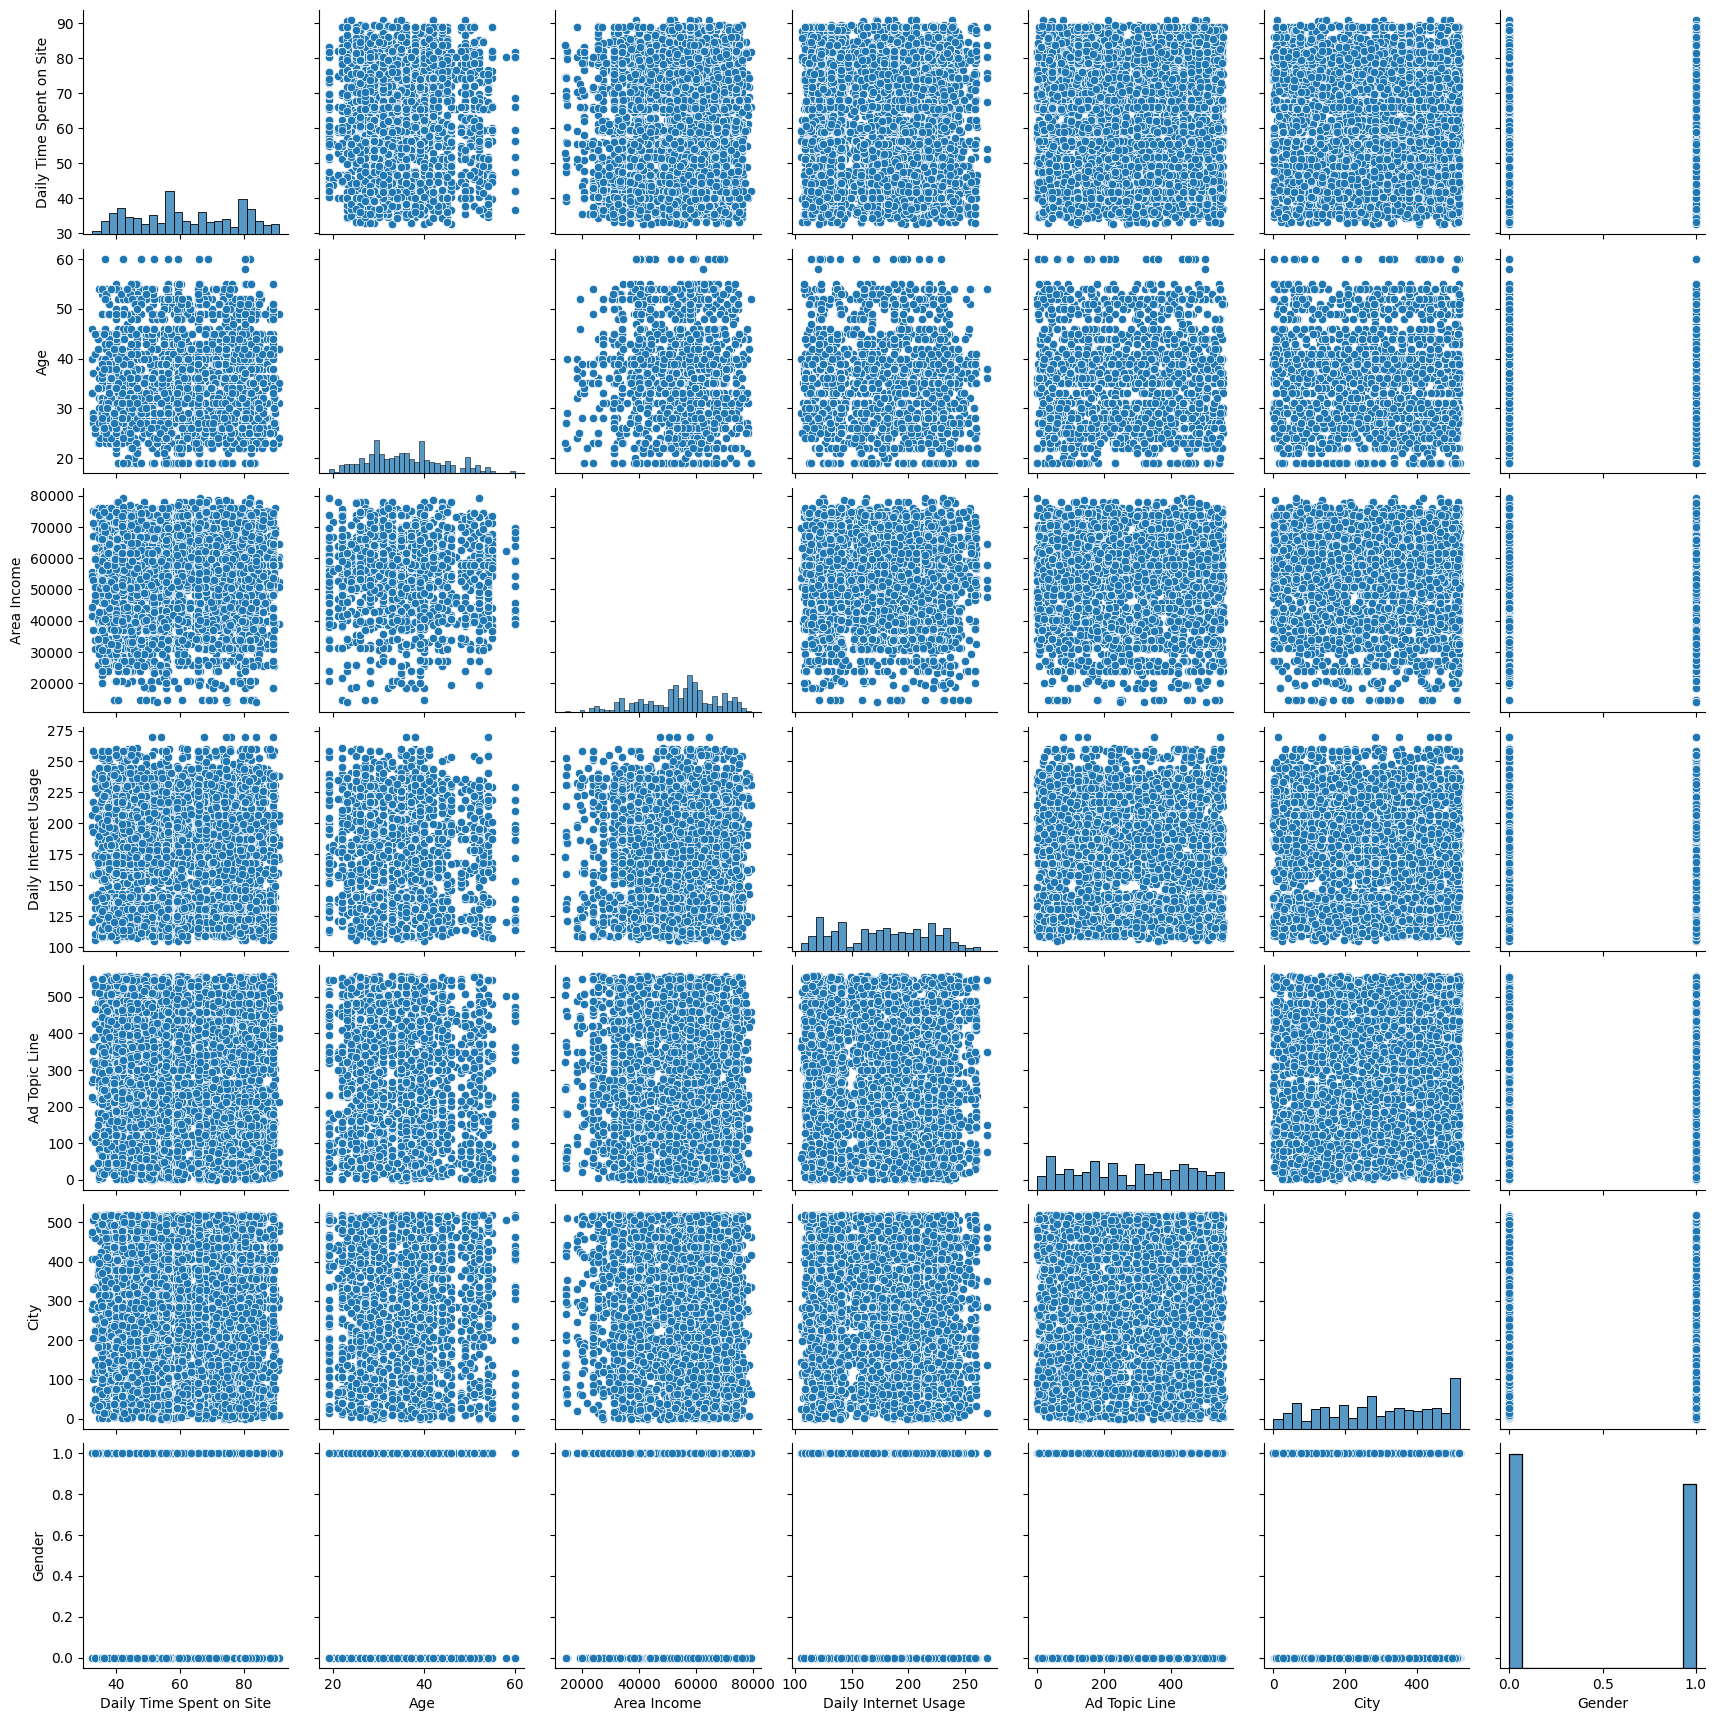

In [ ]:
sns.pairplot(new)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9785 entries, 0 to 9998
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  9785 non-null   float64
 1   Age                       9785 non-null   float64
 2   Area Income               9785 non-null   float64
 3   Daily Internet Usage      9785 non-null   float64
 4   Ad Topic Line             9785 non-null   int64  
 5   City                      9785 non-null   int64  
 6   Gender                    9785 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 611.6 KB


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score,cohen_kappa_score




from IPython.display import display

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model1 = RandomForestClassifier(n_estimators=1000, max_depth=9, criterion="gini")

model1_report = model_report(model1, X_train, Y_train, X_test, Y_test, "Random Forest")

display(model1_report)

Model  roc_auc_score  Accuracy_score  Recall_score  Precision  \
0  Random Forest       0.792076        0.793562      0.747357    0.81078   

   f1_score  Area_under_curve  Kappa_metric  
0  0.777778          0.792076      0.585625

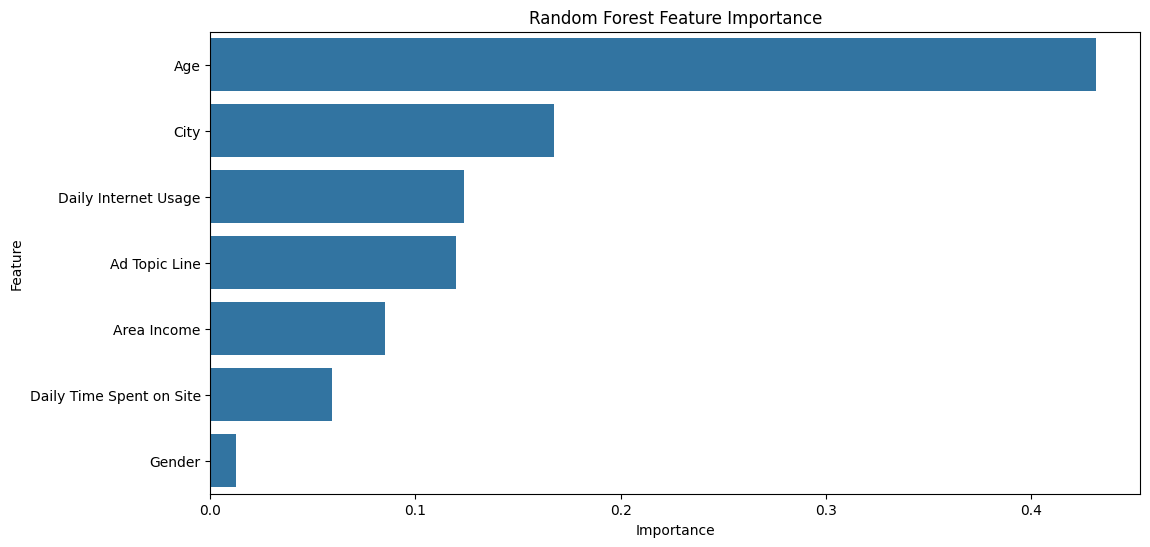

In [ ]:
# Random Forest Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model1.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.show()

# Logistic Regression

In [ ]:


logistic_model = LogisticRegression(random_state=1)
logistic_model.fit(X_train, Y_train)
#outputs for every model
model2_report = model_report(logistic_model, X_train, Y_train, X_test, Y_test, "Logistic Regression")
display(model2_report)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model  roc_auc_score  Accuracy_score  Recall_score  \
0  Logistic Regression       0.678456         0.67859      0.674419   

   Precision  f1_score  Area_under_curve  Kappa_metric  
0   0.665276  0.669816          0.678456      0.356754

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                            weights='uniform')

# Use model_report function to get a DataFrame
model3_report = model_report(knn, X_train, Y_train, X_test, Y_test, "KNN Classifier")

# Display the results
display(model3_report)


Model  roc_auc_score  Accuracy_score  Recall_score  Precision  \
0  KNN Classifier       0.738241        0.738886      0.718816   0.735135   

   f1_score  Area_under_curve  Kappa_metric  
0  0.726884          0.738241      0.476822

#UNSUPERVISED

In [ ]:
df


Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                        62.26  32.0     69481.85                172.83   
1                        41.73  31.0     61840.26                207.17   
2                        44.40  30.0     57877.15                172.83   
3                        59.88  28.0     56180.93                207.17   
4                        49.21  30.0     54324.73                201.58   
...                        ...   ...          ...                   ...   
9994                     41.73  28.0     39799.73                217.37   
9995                     41.73  31.0     61840.26                207.17   
9996                     41.73  28.0     51501.38                120.49   
9997                     55.60  39.0     38067.08                124.44   
9998                     46.61  50.0     43974.49                123.13   

                            Ad Topic Line             City  Gender  \
0         Decentralized real-time circuit         Lisafort    Male   
1          Optional full-range projection  West Angelabury    Male   
2     Total 5thgeneration standardization        Reyesfurt  Female   
3             Balanced empowering success      New Michael  Female   
4     Total 5thgeneration standardization     West Richard  Female   
...                                   ...              ...     ...   
9994       Realigned intangible benchmark    Dustinchester  Female   
9995       Profound executive flexibility  West Angelabury    Male   
9996       Managed zero tolerance concept      Kennedyfurt    Male   
9997       Intuitive exuding service-desk      North Randy  Female   
9998     Realigned content-based leverage   North Samantha  Female   

      Clicked on Ad  
0                 0  
1                 0  
2                 0  
3                 0  
4                 1  
...             ...  
9994              0  
9995              1  
9996              0  
9997              0  
9998              1  

[9785 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

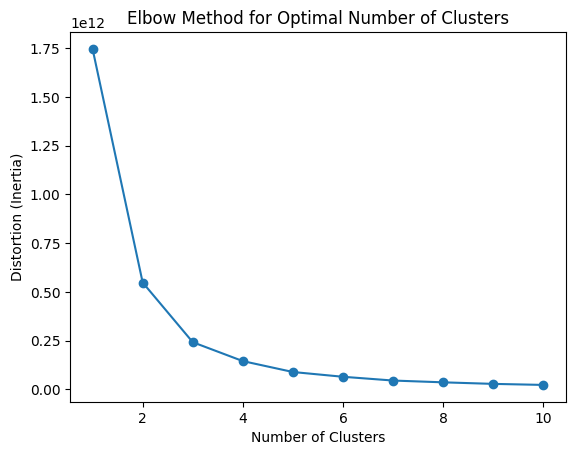

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Visualize the elbow plot
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.show()

Here the optimal number of clusters is 4

In [ ]:
X

Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                        62.26  32.0     69481.85                172.83   
1                        41.73  31.0     61840.26                207.17   
2                        44.40  30.0     57877.15                172.83   
3                        59.88  28.0     56180.93                207.17   
4                        49.21  30.0     54324.73                201.58   
...                        ...   ...          ...                   ...   
9994                     41.73  28.0     39799.73                217.37   
9995                     41.73  31.0     61840.26                207.17   
9996                     41.73  28.0     51501.38                120.49   
9997                     55.60  39.0     38067.08                124.44   
9998                     46.61  50.0     43974.49                123.13   

      Ad Topic Line  City  Gender  
0                96   234       1  
1               301   460       1  
2               484   379       0  
3                24   269       0  
4               484   495       0  
...             ...   ...     ...  
9994            398    58       0  
9995            353   460       1  
9996            241   177       1  
9997            222   316       0  
9998            396   321       0  

[9785 rows x 7 columns]

In [ ]:
X2=df.iloc[:, [0, 3]]
scaler=MinMaxScaler()
scaler.fit_transform(X2)
X2

Daily Time Spent on Site  Daily Internet Usage
0                        62.26                172.83
1                        41.73                207.17
2                        44.40                172.83
3                        59.88                207.17
4                        49.21                201.58
...                        ...                   ...
9994                     41.73                217.37
9995                     41.73                207.17
9996                     41.73                120.49
9997                     55.60                124.44
9998                     46.61                123.13

[9785 rows x 2 columns]

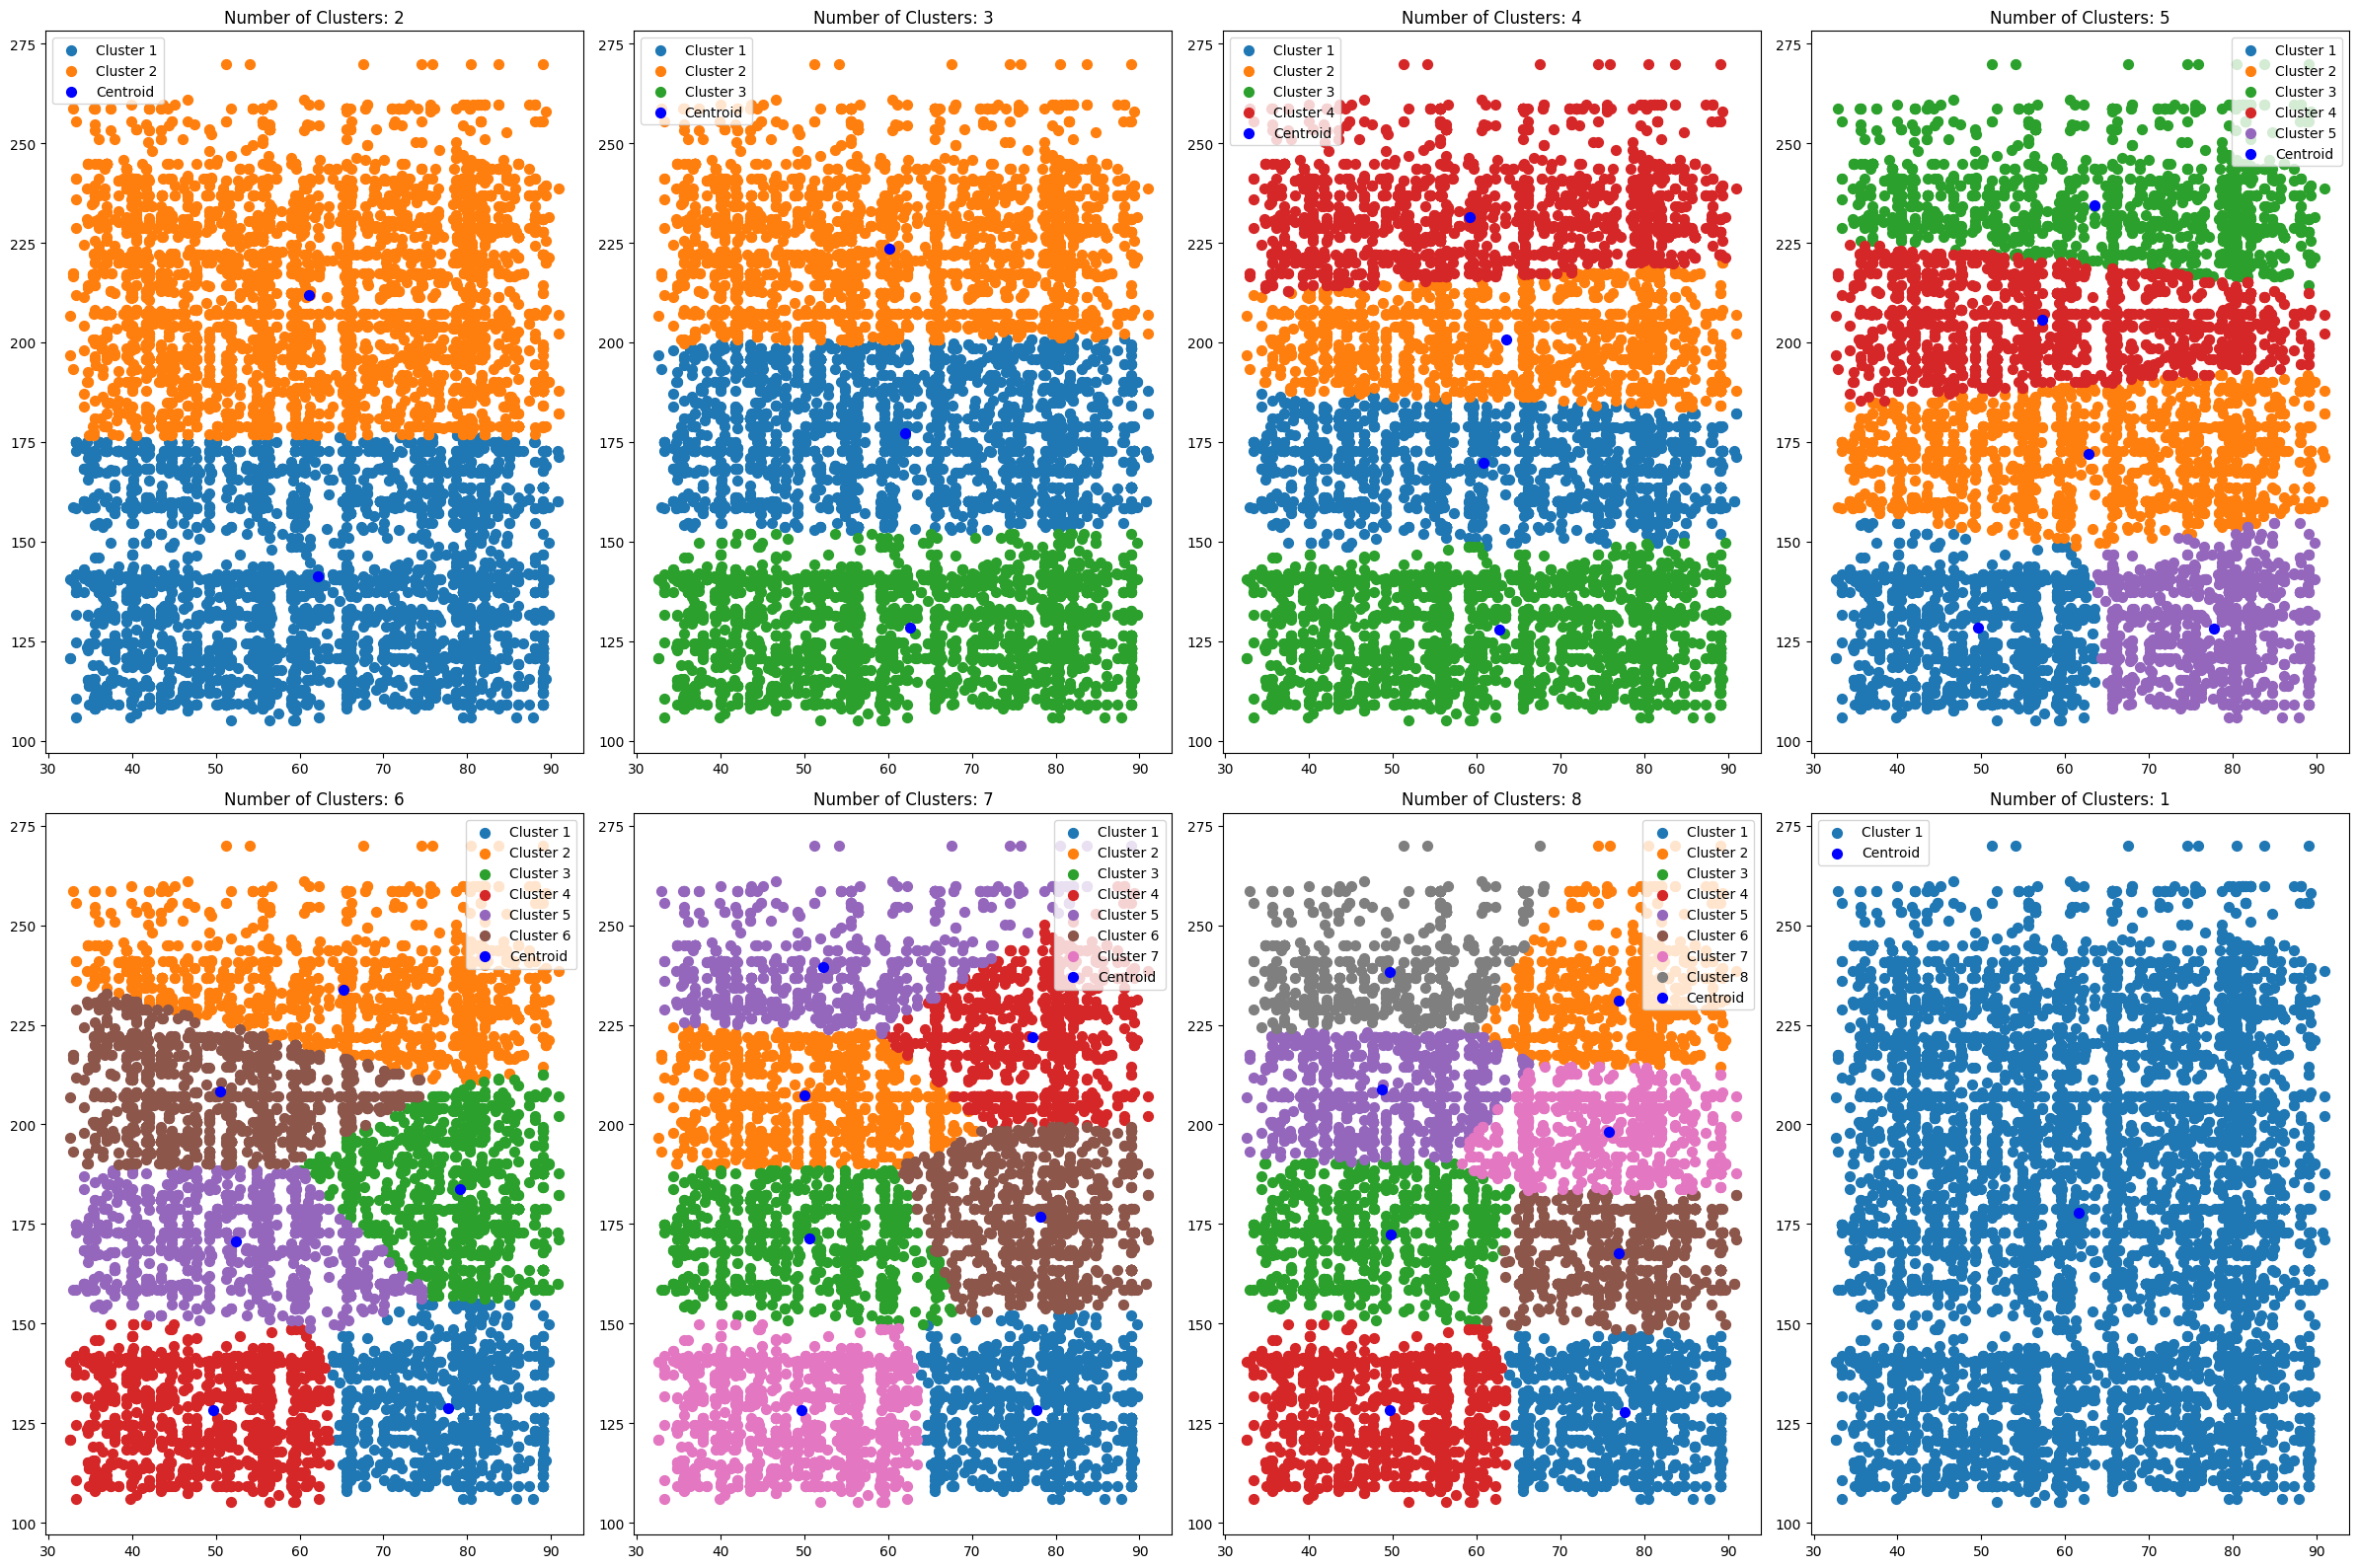

In [ ]:
# Set up a 2x4 grid for subplots
fig, axs = plt.subplots(2, 4, figsize=(24, 16))

# Flatten the axs array for easier indexing
axs = axs.flatten()
num_clusters =8
for num_clusters in range(1, num_clusters + 1):
    # Perform KMeans clustering
    km = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    y_means = km.fit_predict(X2)

    # Scatter plot for each cluster
    for i in range(num_clusters):
      axs[num_clusters - 2].scatter(X2.iloc[y_means == i, 0], X2.iloc[y_means == i, 1], s=50, label=f'Cluster {i + 1}')

    # Plot centroids
    axs[num_clusters - 2].scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='blue', label='Centroid')

    axs[num_clusters - 2].set_title(f'Number of Clusters: {num_clusters}')
    axs[num_clusters - 2].legend()

plt.tight_layout()
plt.show()

In [ ]:
for num_clusters in range(2, 9):
    # Perform KMeans clustering
    km = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    y_means = km.fit_predict(X2)

    print(f'Number of Clusters: {num_clusters}')

    # Print number of samples in each cluster
    for i in range(num_clusters):
        num_samples = np.sum(y_means == i)
        print(f'Cluster {i + 1}: {num_samples} samples')

    print('\n')


Number of Clusters: 2
Cluster 1: 4704 samples
Cluster 2: 5081 samples


Number of Clusters: 3
Cluster 1: 3313 samples
Cluster 2: 3388 samples
Cluster 3: 3084 samples


Number of Clusters: 4
Cluster 1: 2326 samples
Cluster 2: 2161 samples
Cluster 3: 3038 samples
Cluster 4: 2260 samples


Number of Clusters: 5
Cluster 1: 1653 samples
Cluster 2: 2575 samples
Cluster 3: 1826 samples
Cluster 4: 2302 samples
Cluster 5: 1429 samples


Number of Clusters: 6
Cluster 1: 1456 samples
Cluster 2: 1814 samples
Cluster 3: 1402 samples
Cluster 4: 1638 samples
Cluster 5: 1673 samples
Cluster 6: 1802 samples


Number of Clusters: 7
Cluster 1: 1428 samples
Cluster 2: 1655 samples
Cluster 3: 1512 samples
Cluster 4: 1250 samples
Cluster 5: 978 samples
Cluster 6: 1323 samples
Cluster 7: 1639 samples


Number of Clusters: 8
Cluster 1: 1402 samples
Cluster 2: 965 samples
Cluster 3: 1483 samples
Cluster 4: 1639 samples
Cluster 5: 1469 samples
Cluster 6: 946 samples
Cluster 7: 1021 samples
Cluster 8: 860 sample

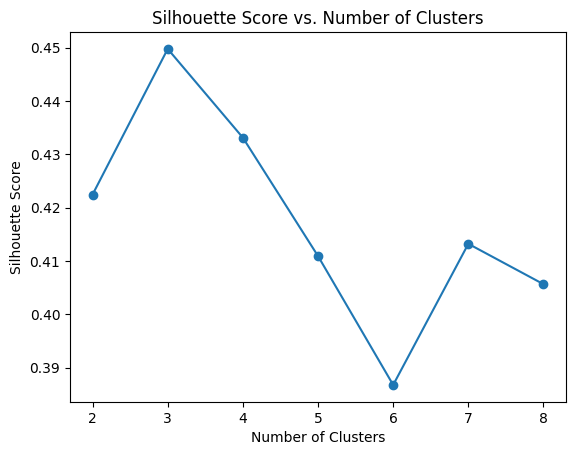

In [ ]:

# Assuming X is your data
# Replace this with your actual data
X2 = np.random.rand(100, 2)

# Range of clusters to test
num_clusters_range = range(2, 9)

# List to store silhouette scores
silhouette_scores = []

for num_clusters in num_clusters_range:
    # Perform KMeans clustering
    km = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    y_means = km.fit_predict(X2)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X2, y_means)
    silhouette_scores.append(silhouette_avg)

# Plotting silhouette scores
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
all_model_reports = pd.concat([model1_report, model2_report, model3_report], ignore_index=True)

# Display the combined model reports
display(all_model_reports)

Model  roc_auc_score  Accuracy_score  Recall_score  \
0        Random Forest       0.792076        0.793562      0.747357   
1  Logistic Regression       0.678456        0.678590      0.674419   
2       KNN Classifier       0.738241        0.738886      0.718816   

   Precision  f1_score  Area_under_curve  Kappa_metric  
0   0.810780  0.777778          0.792076      0.585625  
1   0.665276  0.669816          0.678456      0.356754  
2   0.735135  0.726884          0.738241      0.476822

# Model Evaluation Metrics Comparison

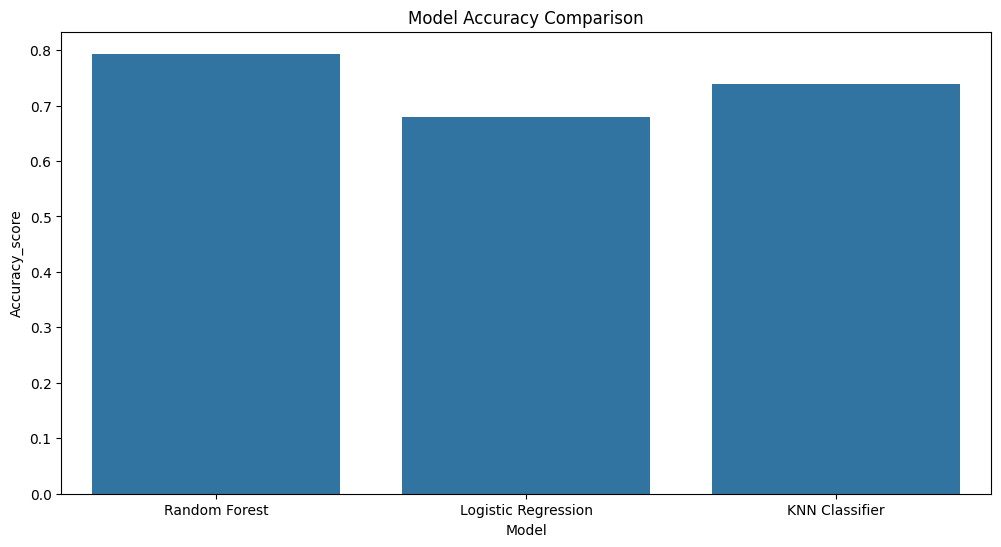

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy_score', data=all_model_reports)
plt.title('Model Accuracy Comparison')
plt.show()

# Confusion matrix

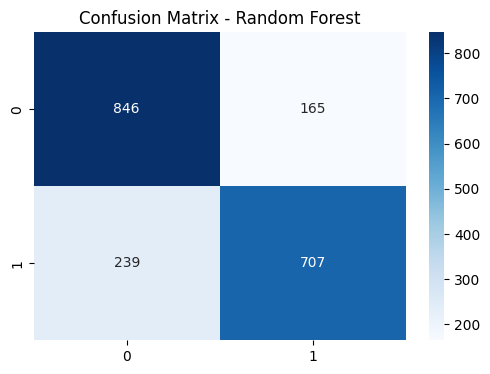

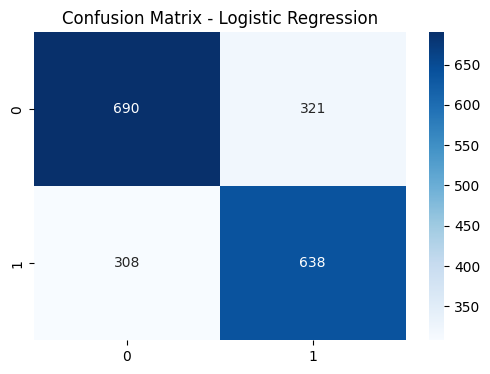

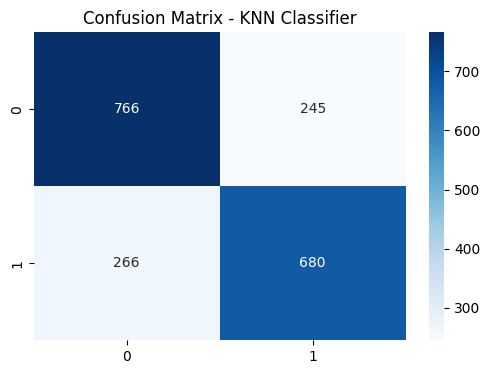

In [ ]:
from sklearn.metrics import confusion_matrix
# Random Forest Confusion Matrix
cm_rf = confusion_matrix(Y_test, model1.predict(X_test))
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(Y_test, logistic_model.predict(X_test))
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# KNN Confusion Matrix
cm_knn = confusion_matrix(Y_test, knn.predict(X_test))
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - KNN Classifier')
plt.show()



# Roc curve

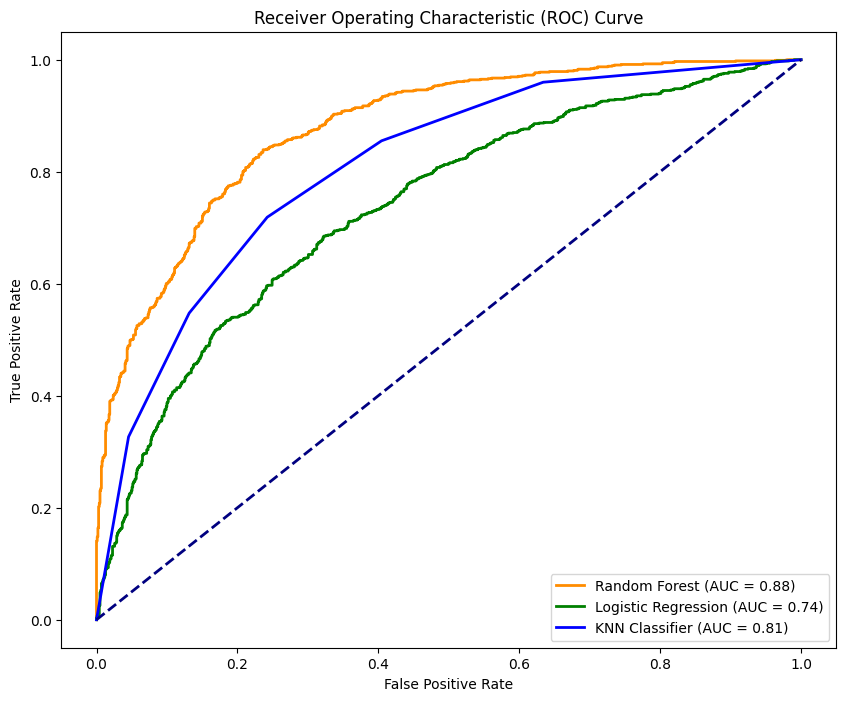

In [ ]:
from sklearn.metrics import roc_curve, auc

# Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, model1.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_test, logistic_model.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_test, knn.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNN Classifier (AUC = {roc_auc_knn:.2f})')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

                            0         1         2         3         4
Random Forest        0.797138  0.796117  0.786919  0.805825  0.797138
Logistic Regression  0.691875  0.683700  0.650485  0.692897  0.698518
KNN                  0.738375  0.737353  0.730199  0.748595  0.728155


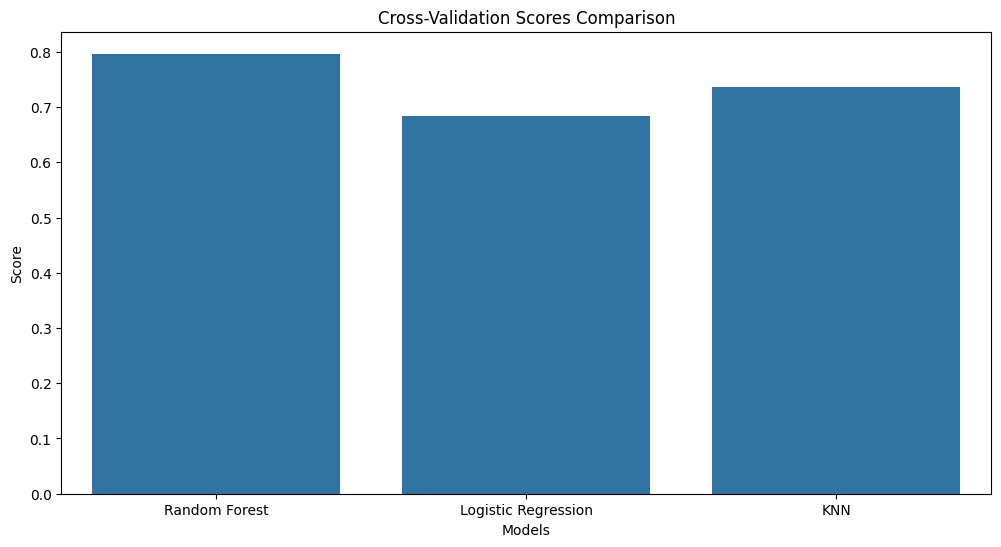

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = {}

# Random Forest
cv_scores['Random Forest'] = cross_val_score(model1, X, Y, cv=5, scoring='accuracy')

# Logistic Regression
cv_scores['Logistic Regression'] = cross_val_score(logistic_model, X, Y, cv=5, scoring='accuracy')

# KNN
cv_scores['KNN'] = cross_val_score(knn, X, Y, cv=5, scoring='accuracy')

# Convert the cross-validation scores to a DataFrame for easy visualization
cv_scores_df = pd.DataFrame(cv_scores).T
print(cv_scores_df)

# Visualize cross-validation scores
plt.figure(figsize=(12, 6))
sns.barplot(x=cv_scores_df.index, y=cv_scores_df.mean(axis=1))
plt.title('Cross-Validation Scores Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.show()

In [ ]:
X.describe()

Daily Time Spent on Site          Age   Area Income  \
count               9785.000000  9785.000000   9785.000000   
mean                  61.601379    35.839550  53948.143348   
std                   15.698216     8.538524  13360.051625   
min                   32.600000    19.000000  13996.500000   
25%                   48.030000    29.000000  44174.250000   
50%                   59.590000    35.000000  56180.930000   
75%                   76.270000    41.000000  62669.590000   
max                   90.970000    60.000000  79332.330000   

       Daily Internet Usage  Ad Topic Line         City       Gender  
count           9785.000000    9785.000000  9785.000000  9785.000000  
mean             177.886144     271.287992   288.064793     0.461625  
std               40.861875     162.956857   155.155843     0.498551  
min              105.220000       0.000000     0.000000     0.000000  
25%              140.150000     127.000000   149.000000     0.000000  
50%              178.920000     260.000000   284.000000     0.000000  
75%              212.870000     425.000000   433.000000     1.000000  
max              269.960000     558.000000   520.000000     1.000000

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X_scaled=scaler.fit_transform(X)
pca=PCA()

In [ ]:
column_names=X.columns
column_names

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender'],
      dtype='object')

In [ ]:
X_scaled=pd.DataFrame(X_scaled,columns=column_names)

In [ ]:
X_scaled

Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
0                     0.508138  0.317073     0.849233              0.410404   
1                     0.156416  0.292683     0.732274              0.618854   
2                     0.202159  0.268293     0.671617              0.410404   
3                     0.467363  0.219512     0.645655              0.618854   
4                     0.284564  0.268293     0.617245              0.584922   
...                        ...       ...          ...                   ...   
9780                  0.156416  0.219512     0.394932              0.680770   
9781                  0.156416  0.292683     0.732274              0.618854   
9782                  0.156416  0.219512     0.574032              0.092692   
9783                  0.394038  0.487805     0.368413              0.116669   
9784                  0.240021  0.756098     0.458829              0.108717   

      Ad Topic Line      City  Gender  
0          0.172043  0.450000     1.0  
1          0.539427  0.884615     1.0  
2          0.867384  0.728846     0.0  
3          0.043011  0.517308     0.0  
4          0.867384  0.951923     0.0  
...             ...       ...     ...  
9780       0.713262  0.111538     0.0  
9781       0.632616  0.884615     1.0  
9782       0.431900  0.340385     1.0  
9783       0.397849  0.607692     0.0  
9784       0.709677  0.617308     0.0  

[9785 rows x 7 columns]

In [ ]:
print(X_scaled.describe())

       Daily Time Spent on Site          Age  Area Income  \
count               9785.000000  9785.000000  9785.000000   
mean                   0.496854     0.410721     0.611481   
std                    0.268943     0.208257     0.204483   
min                    0.000000     0.000000     0.000000   
25%                    0.264348     0.243902     0.461887   
50%                    0.462395     0.390244     0.645655   
75%                    0.748158     0.536585     0.744968   
max                    1.000000     1.000000     1.000000   

       Daily Internet Usage  Ad Topic Line         City       Gender  
count           9785.000000    9785.000000  9785.000000  9785.000000  
mean               0.441096       0.486179     0.553971     0.461625  
std                0.248039       0.292037     0.298377     0.498551  
min                0.000000       0.000000     0.000000     0.000000  
25%                0.212031       0.227599     0.286538     0.000000  
50%                0.447

In [ ]:
X

Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                        62.26  32.0     69481.85                172.83   
1                        41.73  31.0     61840.26                207.17   
2                        44.40  30.0     57877.15                172.83   
3                        59.88  28.0     56180.93                207.17   
4                        49.21  30.0     54324.73                201.58   
...                        ...   ...          ...                   ...   
9994                     41.73  28.0     39799.73                217.37   
9995                     41.73  31.0     61840.26                207.17   
9996                     41.73  28.0     51501.38                120.49   
9997                     55.60  39.0     38067.08                124.44   
9998                     46.61  50.0     43974.49                123.13   

                            Ad Topic Line             City  Gender  
0         Decentralized real-time circuit         Lisafort    Male  
1          Optional full-range projection  West Angelabury    Male  
2     Total 5thgeneration standardization        Reyesfurt  Female  
3             Balanced empowering success      New Michael  Female  
4     Total 5thgeneration standardization     West Richard  Female  
...                                   ...              ...     ...  
9994       Realigned intangible benchmark    Dustinchester  Female  
9995       Profound executive flexibility  West Angelabury    Male  
9996       Managed zero tolerance concept      Kennedyfurt    Male  
9997       Intuitive exuding service-desk      North Randy  Female  
9998     Realigned content-based leverage   North Samantha  Female  

[9785 rows x 7 columns]

In [ ]:
# Separate features and target variable
X = X_scaled
Y = df['Clicked on Ad']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, Y_train)
X_test_lda = lda.transform(X_test)

# Logistic Regression with LDA-transformed features
logistic_model_lda = LogisticRegression(random_state=1)
logistic_model_lda.fit(X_train_lda, Y_train)

# Evaluate the model with LDA-transformed features
model_lda_report = model_report(logistic_model_lda, X_train_lda, Y_train, X_test_lda, Y_test, "Logistic Regression with LDA")
display(model_lda_report)

# Model Evaluation Metrics Comparison
all_model_reports_with_lda = pd.concat([all_model_reports, model_lda_report], ignore_index=True)

# Display the combined model reports with LDA
display(all_model_reports_with_lda)


Model  roc_auc_score  Accuracy_score  Recall_score  \
0  Logistic Regression with LDA       0.723253        0.724067      0.698732   

   Precision  f1_score  Area_under_curve  Kappa_metric  
0   0.721616  0.709989          0.723253      0.446962

Model  roc_auc_score  Accuracy_score  Recall_score  \
0                 Random Forest       0.792076        0.793562      0.747357   
1           Logistic Regression       0.678456        0.678590      0.674419   
2                KNN Classifier       0.738241        0.738886      0.718816   
3  Logistic Regression with LDA       0.723253        0.724067      0.698732   

   Precision  f1_score  Area_under_curve  Kappa_metric  
0   0.810780  0.777778          0.792076      0.585625  
1   0.665276  0.669816          0.678456      0.356754  
2   0.735135  0.726884          0.738241      0.476822  
3   0.721616  0.709989          0.723253      0.446962